# Statisitcs

In [150]:
from scipy import stats 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams.update({
    "figure.figsize" : (16,8),
    "axes.grid" : True
})

plt.style.use('dark_background')

In [151]:
a = np.array([86, 47, 45, 47, 40, 97, 98, 75, 65, 83])

In [152]:
## mean
a.mean()

68.3

In [153]:
## median
np.median(a)

70.0

In [154]:
## variance 
## average of squared difference of each datapoint from dataset's mean
a.var()

454.21000000000004

In [155]:
## standard deviation 
## sqrt of variance 
a.std()

21.312203077110542

In [156]:
## std and var 
## for sample of data not entire population
a.var(ddof=1) , a.std(ddof=1)

(504.6777777777778, 22.46503455990615)

In [157]:
## mode
stats.mode(a)

ModeResult(mode=array([47]), count=array([2]))

In [158]:
## range (max - min)
np.ptp(a)

58

In [159]:
## percentile 
## a value ,below which lies given the percentage of data points 
np.percentile(a,100,interpolation='lower')

98

In [160]:
## Quartiles 
np.percentile(a,[25,50,75],interpolation='lower')

array([47, 65, 83])

In [161]:
## Inter Quartile Range (IQR) 
## difference between third quartile Q3 and first quartile Q1

stats.iqr(a,rng=(25,75),interpolation="lower")

36

#### skewness
- majority of the data present on side of the distribution 


| type1 | type2 | type3 |
| ----- | ----- | ----- |
| right skewed | left skewed | unskewed |
| positive value | negative value | zero |

In [162]:
## skewed 
stats.skew(a)

0.04321019390325423

#### Kurtosis
- indicates how much of data is concentrated around mean or shape of the probability distribution.
- default Ficsher definition 
- can be changed to pearson 


In [163]:
## kurtosis
stats.kurtosis(a)

-1.5694354898634155

## Random Sampling 

- Select Items randomly from population, either with or without replacement.
- Random choice 

In [164]:
## 2 items are selected randomly 

np.random.choice([12,11,56,23],2,replace=False)

array([11, 56])

## Random Seeding 

- To get random choice generated but has to be generated everytime has to be same for peer checking or to generate same results. Get same randomly generated sequence everytime if seed value is determined.
- <b>SEED</b> is a value sets initial state of random number generator.


In [165]:
## It will generate same random number everytime 
np.random.seed(100)
np.random.rand()

0.5434049417909654

## Random Variable

- A set of all possible outcomes of a random experiment is called <b>SAMPLE SPACE</b>
- probability of all outcomes : Probability Distribution
- Random Variable maps to one of the outcomes of the sample space

# Probability Distributions 

        Discrete Probability Distribution 
                    |
                    v
        Probability Mass Function
                    |
                    v
        Continuous form
                    |
                    v
        Probability Density Function

| Distribution Type | Examples |
| ----------------- | ----------- |
| Discrete Distribution | Binomial, Poisson, Hypergeometric, Multinomial, Negative Binomial |
| Continuous Distribution | Normal(Gaussian), Uniform, Chi-Sqaure, F, T |

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm,uniform,chi2,f,t,binom,multinomial,poisson,hypergeom
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


- Continuous Distribution

    - Normal (Gaussian)
    - Uniform 
    - Chi-Sqaure 
    - F
    - T 
    - functions
        - pdf : Probability distribution function
        - cdf : Cumulative distribution function. 
        - sf : Survival function (1 – cdf).
        - rvs : Creating random samples from a distribution.(random variable samples)

- Discrete Distribution

    - Binomial
    - Multinomial 
    - Negative Binomial
    - Poisson
    - Hypergeometric
    - functions
        - pmf : probability mass function
        - cdf : Cumulative distribution function.
        - rvs : Creating random samples from a distribution.(random variable sample)

    
#### Notes
* Using `from scipy.stats import norm,binom`
* `Random Distributions` : scipy.stats module provide a lot of methods for created discrete and continuous random variables.

- The following example defines a normal continuous random variable of mean 1.0 and std 2.5.
- It also estimates probabilities and cumulative probabilities at -1, 0 and 1.
- The example also generates six random numbers from defined normal distribution.

    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].plot()
    ax[1].plot()
    fig.show()

## Normal Distribution

In [56]:
norm_dist = norm(loc=50, scale=5)

<ipython-input-57-7fd8e620fe7f>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


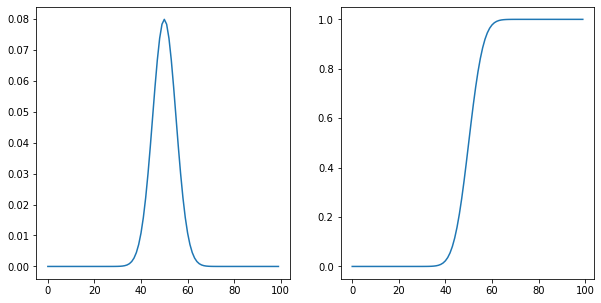

In [57]:
data = range(0,100)

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(data,norm_dist.pdf(data))
ax[1].plot(data,norm_dist.cdf(data))
fig.show()

this one is just to check how rvs works. creating random variable samples.

<ipython-input-61-ece728578b5d>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


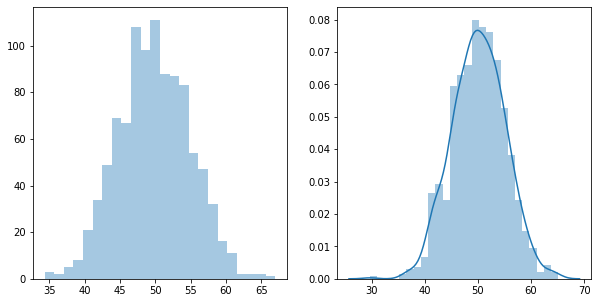

In [61]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(norm_dist.rvs(1000),kde=False,ax=ax[0])
sns.distplot(norm_dist.rvs(1000),kde=True,ax=ax[1])
fig.show()

## Uniform Distribution

In [64]:
uniform_dist = uniform()
uniform_dist

<ipython-input-65-e4e8057ebbd6>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


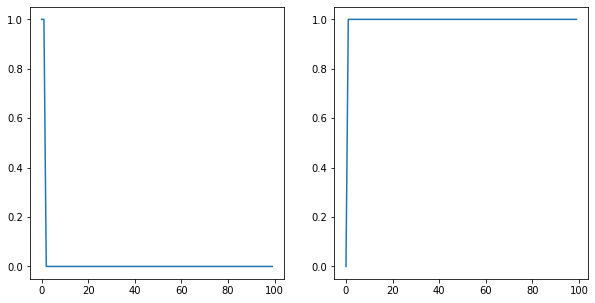

In [65]:
data = range(0,100)

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(data,uniform_dist.pdf(data))
ax[1].plot(data,uniform_dist.cdf(data))
fig.show()

<ipython-input-66-0b15cde243fc>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


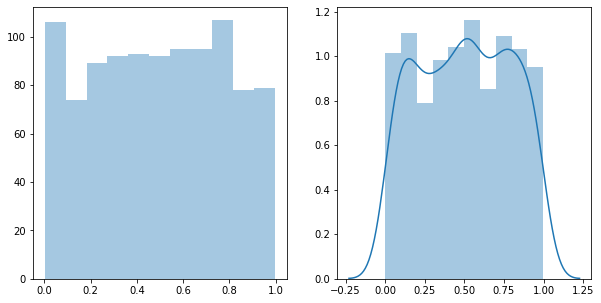

In [66]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(uniform_dist.rvs(1000),kde=False,ax=ax[0])
sns.distplot(uniform_dist.rvs(1000),kde=True,ax=ax[1])
fig.show()

## Chi-squared Distribution

In [68]:
# chi2_dist = chi2()
# chi2_dist

## F Distribution
## T Distribition

## Binomial Distribution

<ipython-input-73-7b35db4fa428>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


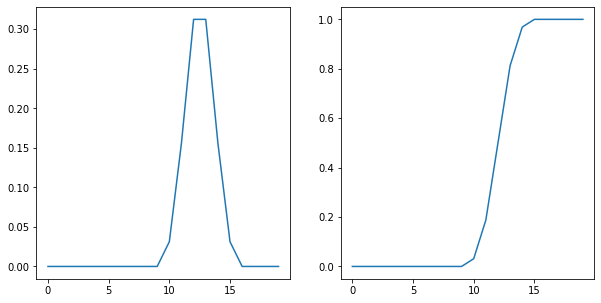

In [73]:
## n and p as shape parameters 
binom_dist = binom(n = 5,p = 0.5)

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(binom_dist.pmf(range(-10,10)))
ax[1].plot(binom_dist.cdf(range(-10,10)))
fig.show()

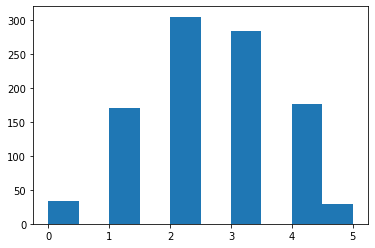

In [77]:

plt.hist(binom_dist.rvs(1000))
plt.show()

## Multinomial Distribution
## Poisson Distribution
## Hypergeometric Distribution